<a href="https://colab.research.google.com/github/quant-IT/Clarusway/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

#!pip install folium 

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df = pd.read_csv("drive/MyDrive/Colab_Notebooks/datasets/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [68]:
df.shape

(10000, 14)

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df.isnull().sum().any()

False

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [73]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

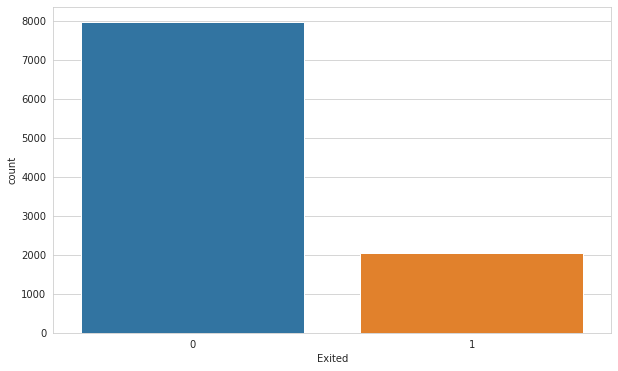

In [74]:
sns.countplot(df["Exited"]);

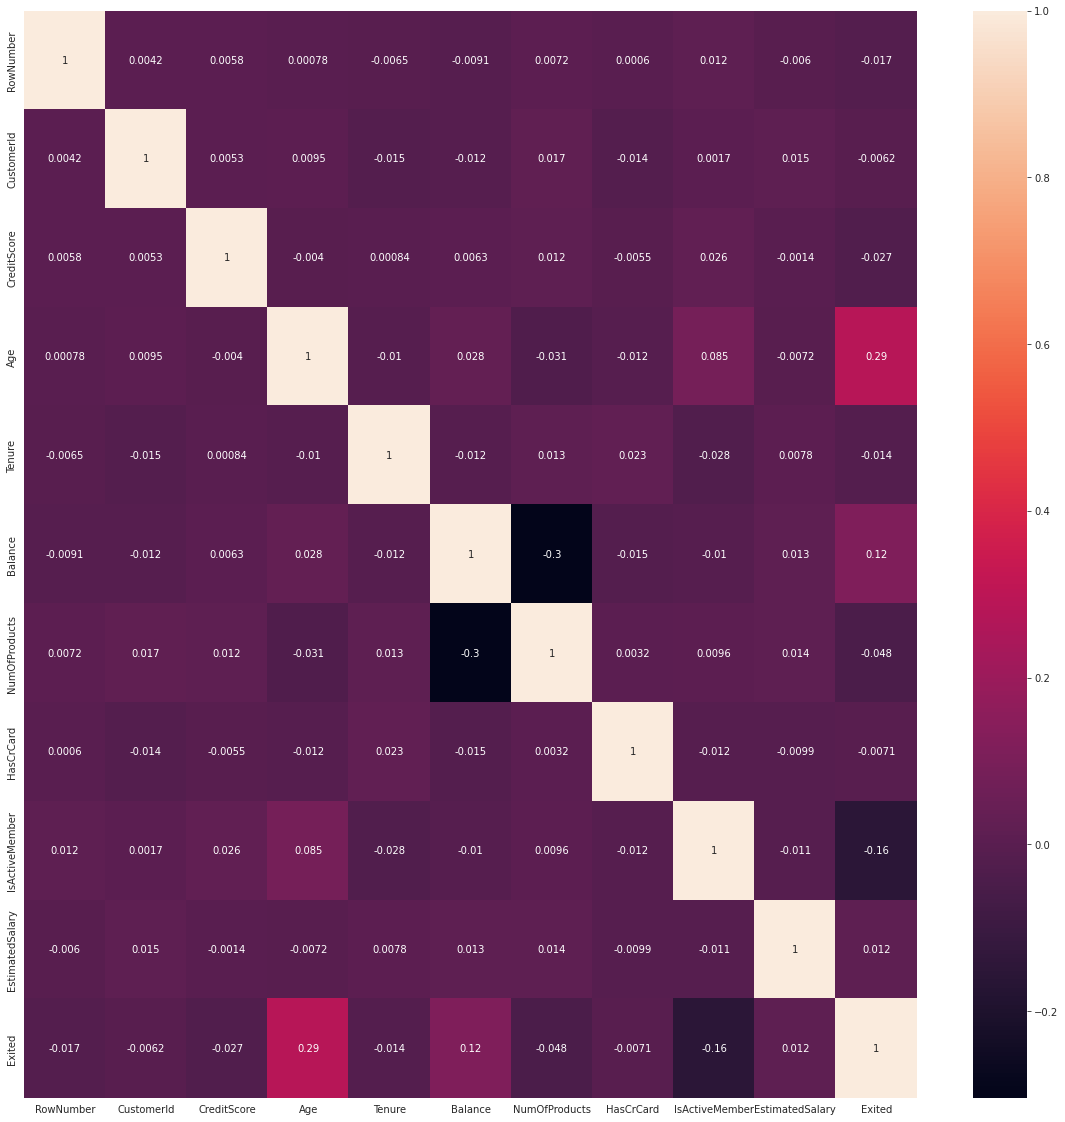

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [76]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [77]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [78]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [79]:
df.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [93]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=101)

In [95]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        #drop="first", 
                        handle_unknown="ignore")

In [96]:
from sklearn.compose import ColumnTransformer

In [97]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [98]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [101]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [102]:
tf.__version__

'2.9.2'

# Modelling & Model Performance

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#!pip install livelossplot

In [115]:
from livelossplot import PlotLossesKerasTF

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [53]:
X_train.shape

(9000, 10)

In [54]:
tf.random.set_seed(101)

In [105]:
model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))

model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=["Recall"])

In [108]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=8,
                           restore_best_weights=True)

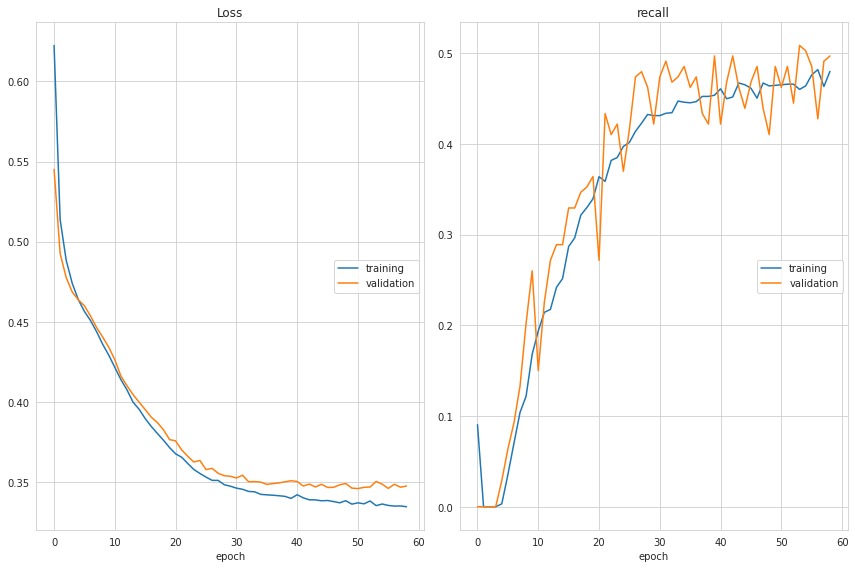

Loss
	training         	 (min:    0.335, max:    0.622, cur:    0.335)
	validation       	 (min:    0.346, max:    0.545, cur:    0.347)
recall
	training         	 (min:    0.000, max:    0.482, cur:    0.480)
	validation       	 (min:    0.000, max:    0.509, cur:    0.497)
60/60 [==============================] - 1s 10ms/step - loss: 0.3345 - recall: 0.4801 - val_loss: 0.3475 - val_recall: 0.4971
Epoch 59: early stopping


In [117]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()])

In [122]:
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(13, 16) dtype=float32, numpy=
 array([[ 2.68609405e-01,  2.45432287e-01, -9.72304791e-02,
         -2.29753241e-01,  1.54145986e-01,  1.19820170e-01,
          1.55845448e-01,  3.25800478e-01,  2.86912620e-01,
          2.70787664e-02,  3.88392657e-01, -1.32922694e-01,
         -3.82826403e-02, -1.15904221e-02,  1.63817748e-01,
          1.00853331e-01],
        [-5.92648327e-01, -2.40576267e-02,  1.00532278e-01,
         -4.50135320e-01, -9.22571570e-02,  1.15506373e-01,
         -2.39063233e-01,  2.66971290e-01,  2.20317096e-02,
          2.50313133e-01,  5.56990743e-01, -2.04956204e-01,
          1.94565684e-01, -2.13618040e-01,  1.40704438e-01,
         -4.48328316e-01],
        [ 1.12316258e-01,  2.98857987e-01,  4.20984954e-01,
         -2.01016530e-01,  2.36544028e-01, -4.97867823e-01,
          1.61411941e-01,  1.85404211e-01,  2.95201421e-01,
          2.05486760e-01,  1.98456705e-01,  8.79030824e-02,
          4.35226150e-02,  1.598709

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                224       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


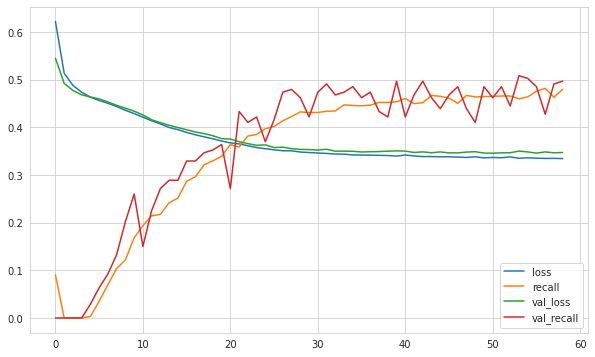

In [121]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot();

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
y_pred = (model.predict(X_test) > .5).astype(
    "int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 743us/step
[[1154   40]
 [ 195  111]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1194
           1       0.74      0.36      0.49       306

    accuracy                           0.84      1500
   macro avg       0.80      0.66      0.70      1500
weighted avg       0.83      0.84      0.82      1500



In [127]:
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score

47/47 [==============================] - 0s 740us/step


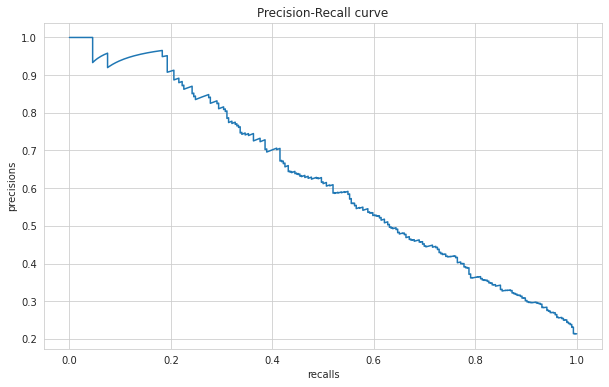

In [128]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [129]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.6256255618303572

In [130]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [133]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [134]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [135]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

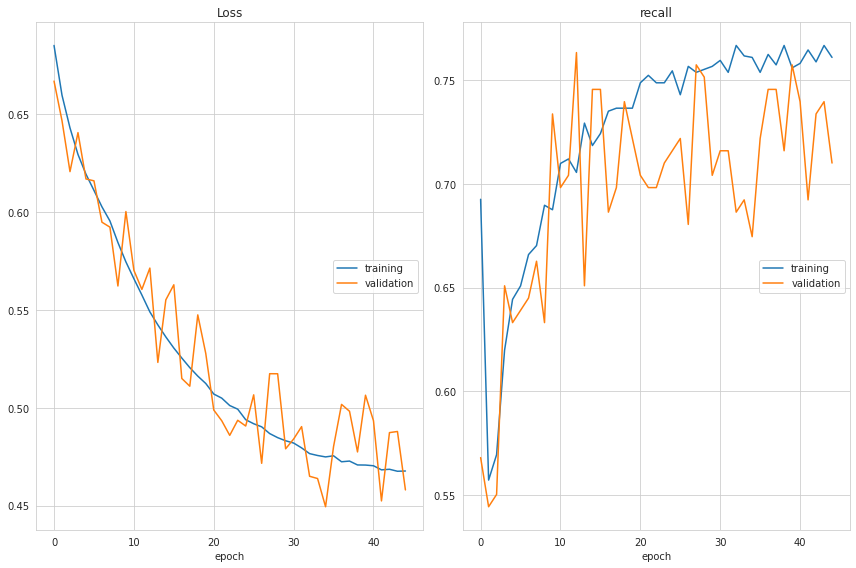

Loss
	training         	 (min:    0.468, max:    0.685, cur:    0.468)
	validation       	 (min:    0.449, max:    0.667, cur:    0.458)
recall
	training         	 (min:    0.557, max:    0.767, cur:    0.761)
	validation       	 (min:    0.544, max:    0.763, cur:    0.710)
54/54 [==============================] - 1s 11ms/step - loss: 0.4677 - recall: 0.7610 - val_loss: 0.4581 - val_recall: 0.7101
Epoch 45: early stopping


In [136]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

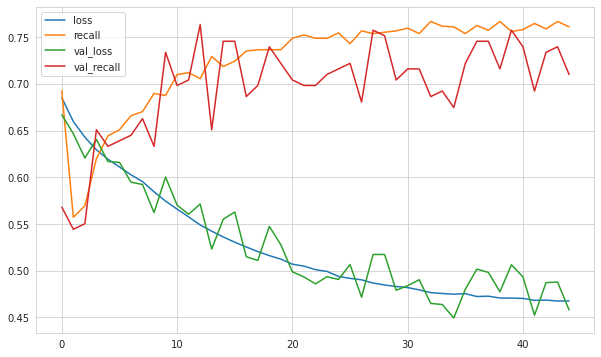

In [137]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [139]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 753us/step
[[971 223]
 [112 194]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1194
           1       0.47      0.63      0.54       306

    accuracy                           0.78      1500
   macro avg       0.68      0.72      0.69      1500
weighted avg       0.81      0.78      0.79      1500



47/47 [==============================] - 0s 765us/step


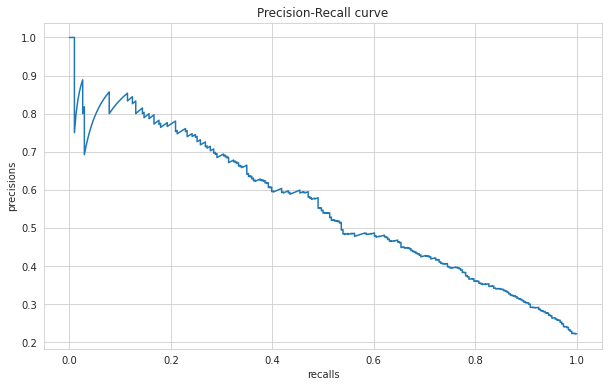

In [140]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [141]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score 

0.5567832750644852

In [142]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [158]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [152]:
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

In [153]:
trial_metric = "Recall"
batch_size = 512


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_split=.1,
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [159]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

NameError: ignored

In [ ]:
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=512,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___